### Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

#### Acknowledgements
Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

License: CC BY 4.0

Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

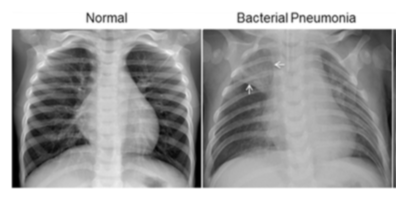

## CNN Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import load_model
model_cnn = load_model("./cnn.hdf5", compile=False)

In [2]:
img_size = 224
test_gen = ImageDataGenerator(rescale = 1/255.)

test_data_generator = test_gen.flow_from_directory('./test',
                                                 target_size = (img_size, img_size),
                                                 batch_size = 16,
                                                 shuffle=False,
                                                 color_mode ="grayscale",
                                                 class_mode='binary',
                                                seed=24)


Found 624 images belonging to 2 classes.


In [3]:
test_classes = test_data_generator.classes

In [4]:
y_pred = model_cnn.predict(test_data_generator)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

In [5]:
print(f"Accuracy Score: {np.round((accuracy_score(test_classes, y_pred)),3)*100}%")

Accuracy Score: 78.2%


In [6]:
labels = ['Normal', 'Pneumonia']
print(f"Classification Report: \n {classification_report(test_classes, y_pred, target_names=labels)}\n")

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.98      0.43      0.60       234
   Pneumonia       0.74      0.99      0.85       390

    accuracy                           0.78       624
   macro avg       0.86      0.71      0.72       624
weighted avg       0.83      0.78      0.76       624




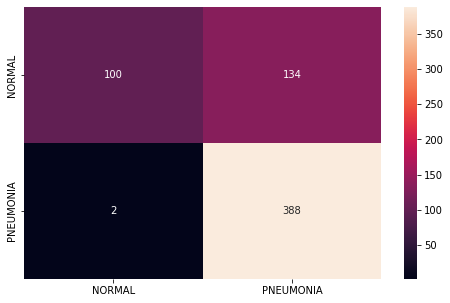

In [7]:
# confusion Matrix
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(test_classes,y_pred),annot=True,fmt='.3g',xticklabels=['NORMAL','PNEUMONIA'],yticklabels=['NORMAL','PNEUMONIA'])
plt.show()

In [8]:
y_pred_probs = y_pred.copy()
filenames = val_data_generator.filenames
#print(filenames)

In [9]:
data = pd.DataFrame()
data['filename'] = filenames
data['actual_class'] = test_classes
data['predicted_class'] = y_pred
data['predicted_prob'] = y_pred_probs

In [10]:
# Amount of misclassified images
misclassification = data[data['actual_class']!=data['predicted_class']]
misclassification

,filename,actual_class,predicted_class,predicted_prob
1,NORMAL\IM-0003-0001.jpeg,0,1.0,1.0
2,NORMAL\IM-0005-0001.jpeg,0,1.0,1.0
3,NORMAL\IM-0006-0001.jpeg,0,1.0,1.0
11,NORMAL\IM-0015-0001.jpeg,0,1.0,1.0
14,NORMAL\IM-0019-0001.jpeg,0,1.0,1.0
...,...,...,...,...
231,NORMAL\NORMAL2-IM-0378-0001.jpeg,0,1.0,1.0
232,NORMAL\NORMAL2-IM-0380-0001.jpeg,0,1.0,1.0
233,NORMAL\NORMAL2-IM-0381-0001.jpeg,0,1.0,1.0
391,PNEUMONIA\person154_bacteria_728.jpeg,1,0.0,0.0


In [11]:
misclassification[(misclassification['actual_class']==0) & (misclassification['predicted_prob']>0.9)]

,filename,actual_class,predicted_class,predicted_prob
1,NORMAL\IM-0003-0001.jpeg,0,1.0,1.0
2,NORMAL\IM-0005-0001.jpeg,0,1.0,1.0
3,NORMAL\IM-0006-0001.jpeg,0,1.0,1.0
11,NORMAL\IM-0015-0001.jpeg,0,1.0,1.0
14,NORMAL\IM-0019-0001.jpeg,0,1.0,1.0
...,...,...,...,...
228,NORMAL\NORMAL2-IM-0374-0001-0002.jpeg,0,1.0,1.0
230,NORMAL\NORMAL2-IM-0376-0001.jpeg,0,1.0,1.0
231,NORMAL\NORMAL2-IM-0378-0001.jpeg,0,1.0,1.0
232,NORMAL\NORMAL2-IM-0380-0001.jpeg,0,1.0,1.0


In [12]:
misclassification[(misclassification['actual_class']==1) & (misclassification['predicted_prob']<0.5)]

,filename,actual_class,predicted_class,predicted_prob
391,PNEUMONIA\person154_bacteria_728.jpeg,1,0.0,0.0
496,PNEUMONIA\person21_virus_53.jpeg,1,0.0,0.0


In [13]:
labels = ['Normal', 'Pneumonia']
samples = val_data_generator.__next__()
images = samples[0]
target = samples[1]

original label: Normal
original label: Normal
original label: Normal
original label: Normal
original label: Normal
original label: Normal
original label: Normal
original label: Normal
original label: Normal


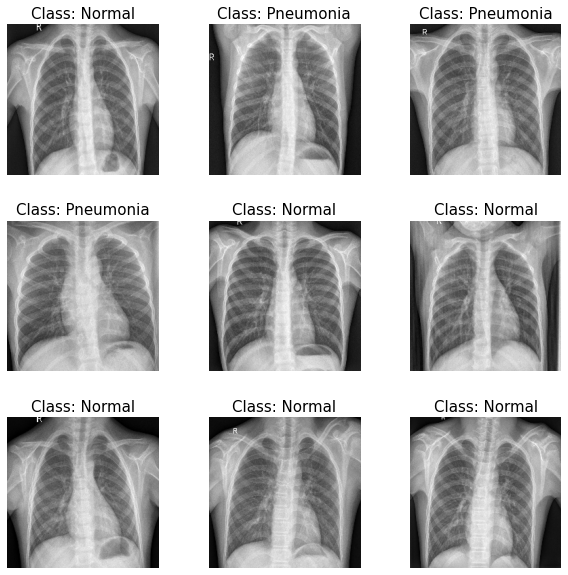

In [14]:
plt.figure(figsize = (10 , 10))
for i in range(9):
    plt.subplot(3 , 3, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i, :, :, :],cmap='gray')
    plt.title('Class: {}'.format(labels[int(y_pred[i])]),fontsize = 15)
    print('original label:',labels[int(target[i])])
    plt.axis('off')

## Pretrained VGG16 with ImageNet weights

In [16]:
model_vgg16 = load_model("./TF_VGG16.hdf5", compile=False)
img_size = 224
test_gen_rgb = ImageDataGenerator(rescale = 1/255.)

test_data_generator_rgb = test_gen_rgb.flow_from_directory('./test',
                                                 target_size = (img_size, img_size),
                                                 batch_size = 16,
                                                 shuffle=False,
                                                 color_mode ="rgb",
                                                 class_mode='binary',
                                                 seed=24)

Found 624 images belonging to 2 classes.


In [17]:
test_classes_rgb = test_data_generator_rgb.classes

In [18]:
y_pred_vgg16 = model_vgg16.predict(test_data_generator_rgb)
y_pred_vgg16[y_pred_vgg16>0.5] = 1
y_pred_vgg16[y_pred_vgg16<0.5] = 0

In [19]:
print(f"Accuracy Score: {np.round((accuracy_score(test_classes_rgb, y_pred_vgg16)),3)*100}%")

Accuracy Score: 82.1%


In [20]:
labels = ['Normal', 'Pneumonia']
print(f"Classification Report: \n {classification_report(test_classes_rgb, y_pred_vgg16, target_names=labels)}\n")

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.98      0.53      0.69       234
   Pneumonia       0.78      0.99      0.87       390

    accuracy                           0.82       624
   macro avg       0.88      0.76      0.78       624
weighted avg       0.85      0.82      0.80       624




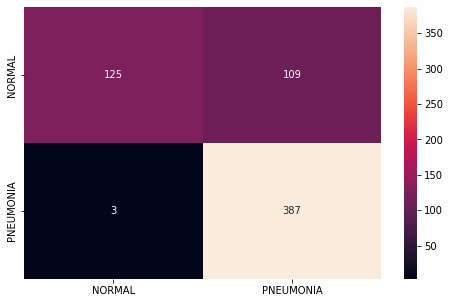

In [21]:
# confusion Matrix
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(test_classes_rgb,y_pred_vgg16),annot=True,fmt='.3g',xticklabels=['NORMAL','PNEUMONIA'],yticklabels=['NORMAL','PNEUMONIA'])
plt.show()

## Pretrained Finetuned VGG16 with ImageNet weights

In [22]:
model_vgg16_finetune = load_model("./TF_VGG16_finetune.hdf5", compile=False)

In [23]:
y_pred_vgg16_finetune = model_vgg16_finetune.predict(test_data_generator_rgb)
y_pred_vgg16_finetune[y_pred_vgg16_finetune>0.5] = 1
y_pred_vgg16_finetune[y_pred_vgg16_finetune<0.5] = 0

In [24]:
print(f"Accuracy Score: {np.round((accuracy_score(test_classes_rgb, y_pred_vgg16_finetune)),3)*100}%")

Accuracy Score: 90.5%


In [25]:
labels = ['Normal', 'Pneumonia']
print(f"Classification Report: \n {classification_report(test_classes_rgb, y_pred_vgg16_finetune, target_names=labels)}\n")

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.90      0.85      0.87       234
   Pneumonia       0.91      0.94      0.93       390

    accuracy                           0.91       624
   macro avg       0.90      0.89      0.90       624
weighted avg       0.91      0.91      0.90       624




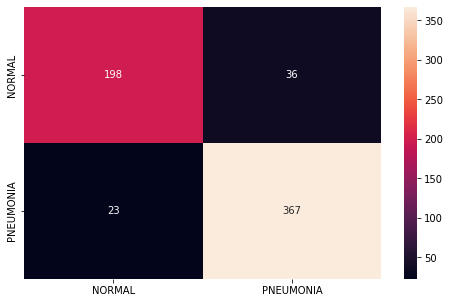

In [26]:
# confusion Matrix
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(test_classes_rgb,y_pred_vgg16_finetune),annot=True,fmt='.3g',xticklabels=['NORMAL','PNEUMONIA'],yticklabels=['NORMAL','PNEUMONIA'])
plt.show()